install datasets -> pip install matplotlib , pip install seaborn , pip install scikit-learn

In [1]:
#Loading the dataset
import pandas as pd

df = pd.read_csv("C:/weather_data.csv")

print(df.head())

         date  avg_temperature   humidity  avg_wind_speed rain_or_not  \
0  2023-01-01        23.745401  46.140905        7.845981        Rain   
1  2023-01-02        30.030503  59.876587        5.382457        Rain   
2  2023-01-03        28.365224  51.464618       13.158008        Rain   
3  2023-01-04        27.550929  53.103799        5.886677        Rain   
4  2023-01-05        23.639303  57.826186       12.248992        Rain   

   cloud_cover     pressure  
0    20.851051   992.965681  
1    93.059521  1037.273025  
2    11.636640  1034.193357  
3    81.744971   968.610142  
4    38.062329  1030.264331  


In [3]:
print(df['rain_or_not'].unique())

['Rain' 'No Rain']


In [5]:
df['rain_or_not'] = df['rain_or_not'].map({'Rain': 1, 'No Rain': 0})  # Convert categorical values
df['rain_or_not'] = df['rain_or_not'].fillna(0).astype(int)  # Ensure integer type

print(df.head())


         date  avg_temperature   humidity  avg_wind_speed  rain_or_not  \
0  2023-01-01        23.745401  46.140905        7.845981            1   
1  2023-01-02        30.030503  59.876587        5.382457            1   
2  2023-01-03        28.365224  51.464618       13.158008            1   
3  2023-01-04        27.550929  53.103799        5.886677            1   
4  2023-01-05        23.639303  57.826186       12.248992            1   

   cloud_cover     pressure  
0    20.851051   992.965681  
1    93.059521  1037.273025  
2    11.636640  1034.193357  
3    81.744971   968.610142  
4    38.062329  1030.264331  


In [7]:
#Convert the 'date' Column to Date Format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

print(df.head())

        date  avg_temperature   humidity  avg_wind_speed  rain_or_not  \
0 2023-01-01        23.745401  46.140905        7.845981            1   
1 2023-01-02        30.030503  59.876587        5.382457            1   
2 2023-01-03        28.365224  51.464618       13.158008            1   
3 2023-01-04        27.550929  53.103799        5.886677            1   
4 2023-01-05        23.639303  57.826186       12.248992            1   

   cloud_cover     pressure  
0    20.851051   992.965681  
1    93.059521  1037.273025  
2    11.636640  1034.193357  
3    81.744971   968.610142  
4    38.062329  1030.264331  


In [9]:
#Fill Missing Values
df.fillna(df.mean(numeric_only=True), inplace=True)

In [13]:
#Check Data Again
print(df.info())  # Shows the structure of the dataset
print(df.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             311 non-null    datetime64[ns]
 1   avg_temperature  311 non-null    float64       
 2   humidity         311 non-null    float64       
 3   avg_wind_speed   311 non-null    float64       
 4   rain_or_not      311 non-null    int32         
 5   cloud_cover      311 non-null    float64       
 6   pressure         311 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int32(1)
memory usage: 15.9 KB
None
        date  avg_temperature   humidity  avg_wind_speed  rain_or_not  \
0 2023-01-01        23.745401  46.140905        7.845981            1   
1 2023-01-02        30.030503  59.876587        5.382457            1   
2 2023-01-03        28.365224  51.464618       13.158008            1   
3 2023-01-04        27.550929  53.103799        5.88

In [15]:
#Exploratory Data Analysis (EDA)
#Check Basic Statistics
print(df.describe())

                      date  avg_temperature    humidity  avg_wind_speed  \
count                  311       311.000000  311.000000      311.000000   
mean   2023-06-05 00:00:00        25.983840   55.041385        7.556636   
min    2023-01-01 00:00:00        15.000000   30.000000        0.069480   
25%    2023-03-19 12:00:00        20.493383   35.686194        3.711684   
50%    2023-06-05 00:00:00        25.983840   55.041385        7.556636   
75%    2023-08-21 12:00:00        31.858688   71.978037       10.897166   
max    2023-11-07 00:00:00        35.000000   90.000000       56.636041   
std                    NaN         6.635859   18.749365        5.213773   

       rain_or_not  cloud_cover     pressure  
count   311.000000   311.000000   311.000000  
mean      0.636656    49.834827  1001.059119  
min       0.000000     0.321826   951.240404  
25%       0.000000    25.955498   975.757545  
50%       1.000000    49.834827  1001.938586  
75%       1.000000    74.162107  1026.5788

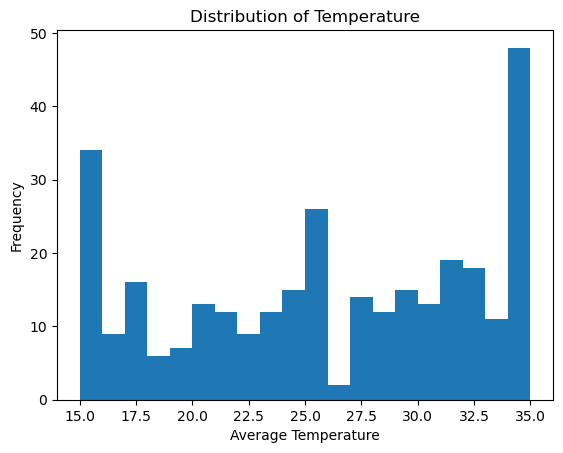

In [ ]:
#Visualize Data
#Histogram of Temperature
import matplotlib.pyplot as plt

plt.hist(df['avg_temperature'], bins=20)
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')
plt.show()

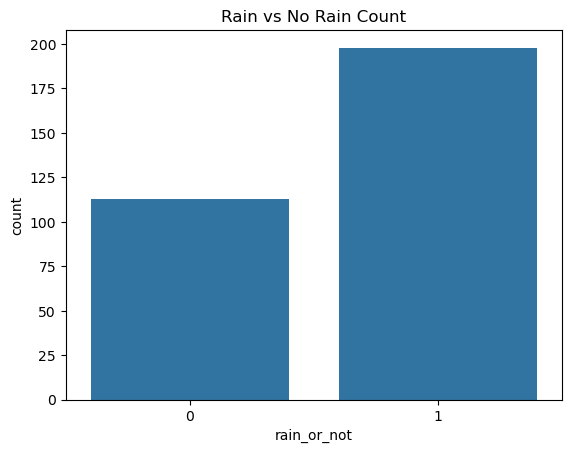

In [19]:
#Rain vs No Rain Count
import seaborn as sns

sns.countplot(x=df['rain_or_not'])
plt.title("Rain vs No Rain Count")
plt.show()

In [21]:
#Train a Machine Learning Model
#Tran a Random Forest Classifier, which is a powerful ML model.
#Import Necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [23]:
X = df[['avg_temperature', 'humidity', 'avg_wind_speed']]  # Features
y = df['rain_or_not']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.54


In [29]:
#Predict Rain for the Next 21 Days
#Create a Future Dataset
import numpy as np

future_dates = pd.date_range(start=df['date'].max(), periods=21, freq='D')
future_data = pd.DataFrame({
    'date': future_dates,
    'avg_temperature': np.random.uniform(df['avg_temperature'].min(), df['avg_temperature'].max(), 21),
    'humidity': np.random.uniform(df['humidity'].min(), df['humidity'].max(), 21),
    'avg_wind_speed': np.random.uniform(df['avg_wind_speed'].min(), df['avg_wind_speed'].max(), 21),
})

# Predict rain probability
future_data['rain_probability'] = model.predict_proba(future_data[['avg_temperature', 'humidity', 'avg_wind_speed']])[:,1]
print(future_data)

         date  avg_temperature   humidity  avg_wind_speed  rain_probability
0  2023-11-07        33.655084  41.274910       24.576589          0.430000
1  2023-11-08        18.828145  62.900152       11.339418          0.620000
2  2023-11-09        25.815019  46.049195       51.784528          0.503333
3  2023-11-10        33.078191  74.975277       23.517214          0.930000
4  2023-11-11        19.355255  63.886432       32.200702          0.570000
5  2023-11-12        17.590761  37.216325       38.686604          0.440000
6  2023-11-13        27.446074  54.860889       10.119844          0.574059
7  2023-11-14        25.937832  84.294326        3.085729          0.690667
8  2023-11-15        34.266375  56.292712       43.981444          0.533529
9  2023-11-16        30.449540  61.079029       41.602894          0.700000
10 2023-11-17        18.089841  74.611368       40.365625          0.700000
11 2023-11-18        20.487959  76.219329       24.047871          0.690000
12 2023-11-1